## Dataset description

### Loans dataset
The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [3]:
pd.set_option('display.max_columns', None)

### Load datasets

In [4]:
loans = pd.read_csv('./SBA_loans_project_2/SBA_loans_project_2.csv')

In [5]:
print("Data shape for loans dataset:", loans.shape)

Data shape for loans dataset: (809247, 19)


### SBA Loans dataset

In [6]:
loans.head(n=3)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1.0,0,0,1,0,N,Y,"$30,000.00",$0.00,"$30,000.00","$27,000.00",P I F
1,LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2.0,0,1,0,1,Y,N,"$50,000.00",$0.00,"$50,000.00","$25,000.00",P I F
2,WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1.0,0,1,10465,2,0,N,"$1,297,000.00",$0.00,"$1,300,000.00","$1,300,000.00",P I F


### Reviewing data

In [7]:
desc_loans_df = describe_more(loans)
desc_loans_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,31289,object,1,30,"{'LOS ANGELES': 10421, 'HOUSTON': 9194, 'NEW Y..."
1,State,51,object,2,3,"{'CA': 117735, 'TX': 63313, 'NY': 52031, 'FL':..."
2,Zip,32740,int64,1,5,"{90015: 843, 10001: 823, 93401: 726, 90010: 66..."
3,Bank,5699,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78119, 'WELLS F..."
4,BankState,56,object,2,3,"{'CA': 106451, 'NC': 71484, 'IL': 59292, 'OH':..."
5,NAICS,1309,int64,1,6,"{0: 181606, 722110: 25266, 722211: 17505, 8111..."
6,NoEmp,576,int64,1,4,"{1: 138747, 2: 124352, 3: 81499, 4: 66471, 5: ..."
7,NewExist,3,float64,3,3,"{1.0: 580544, 2.0: 227662, 0.0: 920}"
8,CreateJob,232,int64,1,4,"{0: 566266, 1: 56838, 2: 52098, 3: 25928, 4: 1..."
9,RetainedJob,347,int64,1,4,"{0: 396245, 1: 79902, 2: 69113, 3: 44894, 4: 3..."


### Dataset preparation and clean-up

I modified and clean-up the dataset as following:
- Replaced Na/Null values with missing/0 values except for the response column - MIS_Status
- Then dropped the rows which had na values in response column after taking care of it for all other columns
- Converted the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
- Converted MIS_Status to 0/1. Replaced value of 'CHGOFF' with 1 and 'P I F' with 0

***Part 1: Replaced Na/Null values***

In [8]:
values_to_fill = {}
for col in loans.drop(columns=['MIS_Status']).columns:
    if loans[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

loans.fillna(value=values_to_fill,inplace=True)

In [9]:
for col in loans.columns:
    if loans[col].isna().any() == True:
        print("Column(s) with missing value(s) in SBA loans dataset is:", col, "of type" , loans[col].dtype.name)

Column(s) with missing value(s) in SBA loans dataset is: MIS_Status of type object


***Part 2: Dropped rows with na value in the response column***

In [10]:
loans['MIS_Status'].unique()

array(['P I F', 'CHGOFF', nan], dtype=object)

In [11]:
len(loans[loans.isna().any(axis=1)]['MIS_Status'])

1796

##### There are 1796 records with nan values in MIS_Status column. We are going to drop those rows from the SBA loans dataset

In [12]:
loans = loans.dropna()

***Part 3: Converted the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']***

In [13]:
col_toFloat = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']

##### Removed the extra spaces at the end of the string, removed the commas, removed the ' $' value from the values in those columns and then converted to Float

In [14]:
for col in col_toFloat:
    loans[col] = loans[col].apply(lambda x: (x.replace(' ','')))
    loans[col] = loans[col].apply(lambda x: (x.replace(',','')))
    loans[col] = loans[col].apply(lambda x: (x.replace('$','')))
    loans[col] = loans[col].astype(float)

In [15]:
loans[col_toFloat].dtypes

DisbursementGross    float64
BalanceGross         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

***Part 3: Converted MIS_Status to 0/1. Make value "CHGOFF" as 1***

In [16]:
loans['MIS_Status'] = loans['MIS_Status'].map({'P I F':0, 'CHGOFF':1}).astype(int)
loans['MIS_Status'].unique()

array([0, 1])

In [17]:
loans.head(n=3)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1.0,0,0,1,0,N,Y,30000.0,0.0,30000.0,27000.0,0
1,LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2.0,0,1,0,1,Y,N,50000.0,0.0,50000.0,25000.0,0
2,WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1.0,0,1,10465,2,0,N,1297000.0,0.0,1300000.0,1300000.0,0


#### Feature Engineering

I added below two new features to see if it helps the model with more information:
- LoanDisbursedPerCity = Loan Disbursed to small businesses per city
- LoanPaid = DisbursementGross - BalanceGross

In [18]:
loans['LoanDisbursedPerCity'] = loans.groupby('City')['DisbursementGross'].transform(np.sum)

In [19]:
loans['LoanPaid'] = loans['DisbursementGross'] - loans['BalanceGross']

## Opening H2O

In [20]:
#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import pandas as pd 

#Install shap package as needed:
#!pip uninstall numpy
#!pip uninstall numba
#!pip install shap==0.40.0

import shap

import h2o
from h2o.estimators import H2OTargetEncoderEstimator

try:
    h2o.cluster().shutdown()
except:
    pass 

In [21]:
#Limit to 3 threads and 8GB memory
h2o.init(nthreads=3, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.2+13, mixed mode)
  Starting server from C:\Users\General\Documents\UTD\Semester 3\Applied Machine Learning\VirtualMachine\ml-spring-2022\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\General\AppData\Local\Temp\tmp9x36zx_3
  JVM stdout: C:\Users\General\AppData\Local\Temp\tmp9x36zx_3\h2o_General_started_from_python.out
  JVM stderr: C:\Users\General\AppData\Local\Temp\tmp9x36zx_3\h2o_General_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.1
H2O_cluster_version_age:,4 months and 8 days !!!
H2O_cluster_name:,H2O_from_python_General_v87rvk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,3
H2O_cluster_status:,"locked, healthy"


**Splitting into train,test and validation dataset**
- With 70% of the data in the training dataset
- Remaining 30% split between testing and validation dataset
- I also made use of stratify parameter to take care of imbalanced class dataset at hand
- It made sure my training dataset have same ratio of 0/1 as in the original dataset

In [22]:
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
loans_train, loans_test = train_test_split(loans, train_size=0.7, random_state=0, stratify=loans['MIS_Status'])

# In the second step we will split the data in test and validation dataset
loans_test, loans_valid = train_test_split(loans_test, train_size=0.5, random_state=0, stratify=loans_test['MIS_Status'])

In [23]:
print("Dimensions of train dataset: ",loans_train.shape)
print("Dimensions of test dataset: ",loans_test.shape)
print("Dimensions of validation dataset: ",loans_valid.shape)

Dimensions of train dataset:  (565215, 21)
Dimensions of test dataset:  (121118, 21)
Dimensions of validation dataset:  (121118, 21)


**Passing the cleaned up dataset with cleaning and manipulations I did in earlier steps to H2O**

In [24]:
loans_train = h2o.H2OFrame(loans_train)
loans_test = h2o.H2OFrame(loans_test)
loans_valid = h2o.H2OFrame(loans_valid)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


**Identifying categorical columns**

In [25]:
# Choose which columns to encode
cat_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc', 'Zip']
response = "MIS_Status"

**Factoring the categorical columns in all the datasets**

- Also factoring the response because it is categorical columns with only two levels - 0/1

In [26]:
loans_train[cat_columns+[response]] = loans_train[cat_columns+[response]].asfactor()
loans_test[cat_columns+[response]] = loans_test[cat_columns+[response]].asfactor()
loans_valid[cat_columns+[response]] = loans_valid[cat_columns+[response]].asfactor()

## Categorical variables encoding

### Target Encoding

- Performing target encoding on all categorical variables
- Renaming the encoded columns as "ColumnName_te"
- Dropping the original columns from the dataframe which have been encoded
- Using the target encoded columns for the GLM model later (not GBM)

In [27]:
# Train a Target Encoder model
data_te = H2OTargetEncoderEstimator(#fold_column=fold_column,
                                    data_leakage_handling=None,
                                    blending=True,
                                    inflection_point=3,
                                    smoothing=10,
                                    noise=0.15,     # In general, the less data you have the more regularization you need
                                    seed=1234)

data_te.train(x=cat_columns,
              y=response,
              training_frame=loans_train,
              validation_frame=loans_valid)

targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%
Model Details
H2OTargetEncoderEstimator :  TargetEncoder
Model Key:  TargetEncoder_model_python_1651954762791_1


Target Encoder model summary: Summary for target encoder model


,original_names,encoded_column_names
0,City,City_te
1,State,State_te
2,Zip,Zip_te
3,Bank,Bank_te
4,BankState,BankState_te
5,RevLineCr,RevLineCr_te
6,LowDoc,LowDoc_te


In [28]:
# New target encoded dataset
train_te = data_te.transform(frame=loans_train, as_training=True)
test_te = data_te.transform(frame=loans_test, as_training=False)
valid_te = data_te.transform(frame=loans_valid, as_training=False)

predictors = train_te.columns
for col in cat_columns+[response]:
    predictors.remove(col)

In [29]:
predictors

['City_te',
 'State_te',
 'Zip_te',
 'Bank_te',
 'BankState_te',
 'RevLineCr_te',
 'LowDoc_te',
 'NAICS',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'FranchiseCode',
 'UrbanRural',
 'DisbursementGross',
 'BalanceGross',
 'GrAppv',
 'SBA_Appv',
 'LoanDisbursedPerCity',
 'LoanPaid']

## Linear Model

### GLM model

- For GLM model we use target encoding for the categorical variables. It will make explaining features coefficients much easier.
- The transformation (Target encoding) is performed using H2OTargetEncoderEstimator
- Then ran a default GLM model

In [30]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
print("Predictor columns:", predictors)    
print("Response variable:", response)

glm_model = H2OGeneralizedLinearEstimator(family="binomial",
                                          nfolds=0, #No cross-validation (faster)
                                          alpha=0,
                                          lambda_=0.3,
                                          compute_p_values=False,
                                          seed=1234,
                                          )
glm_model.train(predictors, response, 
                training_frame= train_te, 
                validation_frame= valid_te)

model_summary = glm_model.summary()
print(model_summary)

Predictor columns: ['City_te', 'State_te', 'Zip_te', 'Bank_te', 'BankState_te', 'RevLineCr_te', 'LowDoc_te', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'LoanDisbursedPerCity', 'LoanPaid']
Response variable: MIS_Status
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%

GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.3 ),20,20,3,_8b64612171c04da7784a143c52ef47cc


**Testing the performance of my GLM (not tuned yet) model on the testing dataset**

In [31]:
glm_model.model_performance(test_te)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13426607635946755
RMSE: 0.3664233567329839
LogLoss: 0.4306741833213397
Null degrees of freedom: 121117
Residual degrees of freedom: 121097
Null deviance: 112484.14265358535
Residual deviance: 104324.79147102803
AIC: 104366.79147102803
AUC: 0.7096346612963821
AUCPR: 0.3587271337053227
Gini: 0.41926932259276417

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19484027473290383: 


,,0,1,Error,Rate
0,0,71700.0,28173.0,0.2821,(28173.0/99873.0)
1,1,8832.0,12413.0,0.4157,(8832.0/21245.0)
2,Total,80532.0,40586.0,0.3055,(37005.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.194840,0.401514,192.0
1,max f2,0.146060,0.554404,271.0
2,max f0point5,0.248554,0.381182,123.0
3,max accuracy,0.320868,0.828258,62.0
4,max precision,0.512458,0.833333,2.0
5,max recall,0.015575,1.000000,397.0
6,max specificity,0.571089,0.999990,0.0
7,max absolute_mcc,0.216240,0.245864,162.0
8,max min_per_class_accuracy,0.182949,0.652369,210.0
9,max mean_per_class_accuracy,0.185641,0.653731,206.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.359539,3.645449,3.645449,0.639439,0.394410,0.639439,0.394410,0.036479,0.036479,264.544909,264.544909,0.032104
1,2,0.020005,0.331876,3.036460,3.341080,0.532618,0.344349,0.586050,0.369390,0.030360,0.066839,203.645974,234.108008,0.056797
2,3,0.030004,0.314875,2.834029,3.172110,0.497110,0.322983,0.556412,0.353925,0.028336,0.095175,183.402909,217.210960,0.079035
3,4,0.040002,0.301910,2.669260,3.046423,0.468208,0.307976,0.534365,0.342440,0.026689,0.121864,166.925996,204.642313,0.099275
4,5,0.050001,0.291905,2.283229,2.893810,0.400495,0.296773,0.507596,0.333308,0.022829,0.144693,128.322941,189.380959,0.114835
5,6,0.100002,0.259498,2.058803,2.476306,0.361129,0.274037,0.434363,0.303673,0.102942,0.247635,105.880338,147.630649,0.179038
6,7,0.150002,0.239530,1.752854,2.235156,0.307464,0.248963,0.392063,0.285436,0.087644,0.335279,75.285409,123.515569,0.224688
7,8,0.200003,0.224624,1.530688,2.059039,0.268494,0.231879,0.361171,0.272047,0.076536,0.411815,53.068783,105.903872,0.256868
8,9,0.300005,0.201473,1.310875,1.809651,0.229937,0.212413,0.317426,0.252169,0.131090,0.542904,31.087504,80.965083,0.294569
9,10,0.399998,0.182848,1.098213,1.631802,0.192635,0.191854,0.286230,0.237091,0.109814,0.652718,9.821328,63.180245,0.306479


## Model Tuning for GLM

- Performing model tuning for my GLM model here
- Not performing the cross validation here (nfolds=0) and instead using the validation_frame parameter
- I have set the family feature as binomial since the response is a  categorical variable with 2 levels/classes.
- In my grid search, I am tuning the following parameters using Cartesian search criteria (default) - alpha and lambda.

In [32]:
from h2o.grid.grid_search import H2OGridSearch

glm_model_tune = H2OGeneralizedLinearEstimator(nfolds=0,
                                               family= "binomial",
                                               stopping_rounds=5,
                                               keep_cross_validation_predictions = False,
                                               seed=1234)

# GLM hyperparameters
glm_params  = {
               'alpha': [0, 0.1, 0.2, 0.3,0.5,0.7,0.8,0.9,1],
               'lambda': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]            
               }

# Train and validate a cartesian grid of GLMs
glm_grid  = H2OGridSearch(model=glm_model_tune,
                          grid_id='glm_grid',
                          hyper_params=glm_params,
                          search_criteria={ 'strategy': "Cartesian"})

x = predictors 
y = response

glm_grid.train(x=x, y=y,
               training_frame=train_te,
               validation_frame=valid_te
               )

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
      alpha  lambda          model_ids   logloss
0       0.9    0.01   glm_grid_model_8  0.411975
1       0.8    0.01   glm_grid_model_7  0.412028
2       0.7    0.01   glm_grid_model_6  0.412033
3       1.0    0.01   glm_grid_model_9  0.412076
4       0.5    0.01   glm_grid_model_5  0.412150
5       0.3    0.01   glm_grid_model_4  0.412521
6       0.2    0.01   glm_grid_model_3  0.412690
7       0.1    0.01   glm_grid_model_2  0.412837
8       0.0    0.01   glm_grid_model_1  0.413038
9       0.0    0.05  glm_grid_model_10  0.414112
10      0.1    0.05  glm_grid_model_11  0.414860
11      0.2    0.05  glm_grid_model_12  0.416349
12      0.0    0.10  glm_grid_model_19  0.418470
13      0.3    0.05  glm_grid_model_13  0.418548
14      0.1    0.10  glm_grid_model_20  0.422233
15      0.5    0.05  glm_grid_model_14  0.425246
16      0.0    0.20  glm_grid_model_28  0.425445
17      0.2    0.10  gl

**Sorting the results of my grid search (GLM) in descending order based on AUC to get the model with highest AUC**

In [33]:
glm_gridperf1 = glm_grid.get_grid(sort_by='AUC', decreasing=True)
glm_gridperf1

      alpha  lambda          model_ids       auc
0       0.5    0.01   glm_grid_model_5  0.732247
1       0.7    0.01   glm_grid_model_6  0.732129
2       0.9    0.01   glm_grid_model_8  0.732079
3       0.0    0.01   glm_grid_model_1  0.732062
4       0.1    0.01   glm_grid_model_2  0.732053
5       1.0    0.01   glm_grid_model_9  0.732006
6       0.8    0.01   glm_grid_model_7  0.731975
7       0.2    0.01   glm_grid_model_3  0.731961
8       0.3    0.01   glm_grid_model_4  0.731945
9       0.1    0.05  glm_grid_model_11  0.729371
10      0.0    0.05  glm_grid_model_10  0.728998
11      0.2    0.05  glm_grid_model_12  0.728255
12      0.3    0.05  glm_grid_model_13  0.725183
13      0.0    0.10  glm_grid_model_19  0.724338
14      0.1    0.10  glm_grid_model_20  0.720492
15      0.0    0.20  glm_grid_model_28  0.716594
16      0.0    0.30  glm_grid_model_37  0.710694
17      0.5    0.05  glm_grid_model_14  0.709805
18      0.2    0.10  glm_grid_model_21  0.708339
19      0.0    0.40 

**The parameters selected by the grid search for the best model (GLM) are:** 

In [34]:
bestmodel_glm_sbaLoans = glm_gridperf1.models[0]

print("The best set of parameters for the GLM function:")
print("Best alpha value", bestmodel_glm_sbaLoans.actual_params['alpha'])
print("Best lambda value", bestmodel_glm_sbaLoans.actual_params['lambda'])

The best set of parameters for the GLM function:
Best alpha value [0.5]
Best lambda value [0.01]


### Final Best Tuned GLM Model

- With the parameters selected by the grid search above with:
- alpha = 0.5
- lambda = 0.01

- Showing it just for reference because grid search takes some time to run 
- but using the first model after sorting the grid results with highest AUC from above to save 

In [35]:
glm_model_tuned_sba = H2OGeneralizedLinearEstimator(nfolds=0,
                                               family= "binomial",
                                               stopping_rounds=5,
                                               keep_cross_validation_predictions = False,
                                               alpha = 0.5,
                                               lambda_ = 0.01,
                                               seed=1234)

glm_model_tuned_sba.train(x=x, y=y,
                         training_frame=train_te,
                         validation_frame=valid_te
                         )

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1651954762791_114


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 0.01 )",20,10,51,_8b64612171c04da7784a143c52ef47cc




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.11957032567365003
RMSE: 0.34578942388923645
LogLoss: 0.3856299048265723
Null degrees of freedom: 565214
Residual degrees of freedom: 565204
Null deviance: 524927.1626846272
Residual deviance: 435927.6133131021
AIC: 435949.6133131021
AUC: 0.783800219301796
AUCPR: 0.46808145914503796
Gini: 0.567600438603592

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22450428774447548: 


,,0,1,Error,Rate
0,0,383433.0,82638.0,0.1773,(82638.0/466071.0)
1,1,42427.0,56717.0,0.4279,(42427.0/99144.0)
2,Total,425860.0,139355.0,0.2213,(125065.0/565215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.224504,0.475616,225.0
1,max f2,0.134215,0.602817,293.0
2,max f0point5,0.340832,0.479065,161.0
3,max accuracy,0.437113,0.839183,122.0
4,max precision,0.943500,0.984375,2.0
5,max recall,0.016174,1.000000,397.0
6,max specificity,0.968370,0.999998,0.0
7,max absolute_mcc,0.248426,0.350062,211.0
8,max min_per_class_accuracy,0.175872,0.709098,259.0
9,max mean_per_class_accuracy,0.174669,0.710437,260.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010002,0.698055,4.557331,4.557331,0.799399,0.777647,0.799399,0.777647,0.045580,0.045580,355.733127,355.733127,0.043147
1,2,0.020001,0.608675,3.894439,4.225914,0.683121,0.649802,0.741265,0.713730,0.038943,0.084524,289.443886,322.591438,0.078248
2,3,0.030001,0.549852,3.536364,3.996078,0.620311,0.577551,0.700949,0.668340,0.035363,0.119886,253.636433,299.607792,0.109006
3,4,0.040001,0.504881,3.294286,3.820638,0.577849,0.526334,0.670176,0.632840,0.032942,0.152828,229.428576,282.063764,0.136829
4,5,0.050000,0.468843,3.044138,3.665343,0.533970,0.486132,0.642935,0.603500,0.030441,0.183269,204.413792,266.534319,0.161618
5,6,0.100001,0.352552,2.605682,3.135512,0.457061,0.403618,0.549998,0.503559,0.130285,0.313554,160.568178,213.551249,0.258981
6,7,0.150001,0.290460,2.092292,2.787772,0.367008,0.318954,0.489001,0.442024,0.104616,0.418170,109.229167,178.777221,0.325214
7,8,0.200000,0.250579,1.708469,2.517954,0.299682,0.269172,0.441673,0.398812,0.085421,0.503591,70.846945,151.795368,0.368171
8,9,0.300001,0.199314,1.370520,2.135473,0.240402,0.223000,0.374582,0.340208,0.137053,0.640644,37.051963,113.547341,0.413106
9,10,0.400000,0.163823,1.045257,1.862922,0.183348,0.180771,0.326774,0.300349,0.104525,0.745169,4.525656,86.292161,0.418594




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12841818130302324
RMSE: 0.35835482597981466
LogLoss: 0.41214977642450706
Null degrees of freedom: 121117
Residual degrees of freedom: 121107
Null deviance: 112484.1426535855
Residual deviance: 99837.51324196691
AIC: 99859.51324196691
AUC: 0.7322469166342549
AUCPR: 0.3849661810748978
Gini: 0.4644938332685098

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2138371640040739: 


,,0,1,Error,Rate
0,0,78600.0,21273.0,0.213,(21273.0/99873.0)
1,1,9998.0,11247.0,0.4706,(9998.0/21245.0)
2,Total,88598.0,32520.0,0.2582,(31271.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.213837,0.418376,228.0
1,max f2,0.114032,0.568876,311.0
2,max f0point5,0.320925,0.409399,164.0
3,max accuracy,0.504047,0.830273,89.0
4,max precision,0.970026,1.000000,0.0
5,max recall,0.020027,1.000000,395.0
6,max specificity,0.970026,1.000000,0.0
7,max absolute_mcc,0.236788,0.275050,213.0
8,max min_per_class_accuracy,0.166991,0.665786,263.0
9,max mean_per_class_accuracy,0.161313,0.667435,268.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.47 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.682501,3.800675,3.800675,0.666667,0.761105,0.666667,0.761105,0.038032,0.038032,280.067467,280.067467,0.033987
1,2,0.020005,0.594542,3.220060,3.510487,0.564822,0.634355,0.615766,0.697756,0.032196,0.070228,222.005963,251.048696,0.060906
2,3,0.030004,0.538914,3.003506,3.341540,0.526837,0.565192,0.586131,0.653580,0.030031,0.100259,200.350591,234.153978,0.085200
3,4,0.040002,0.495358,2.923475,3.237045,0.512799,0.516489,0.567802,0.619315,0.029230,0.129489,192.347519,223.704521,0.108523
4,5,0.050001,0.460473,2.650429,3.119741,0.464905,0.476902,0.547226,0.590837,0.026500,0.155990,165.042920,211.974138,0.128535
5,6,0.100002,0.348839,2.215073,2.667407,0.388540,0.397982,0.467883,0.494409,0.110755,0.266745,121.507286,166.740712,0.202213
6,7,0.150002,0.288143,1.846051,2.393622,0.323811,0.315610,0.419859,0.434810,0.092304,0.359049,84.605095,139.362173,0.253515
7,8,0.200003,0.249623,1.590936,2.192950,0.279062,0.267609,0.384660,0.393009,0.079548,0.438597,59.093631,119.295037,0.289348
8,9,0.300005,0.199565,1.253451,1.879784,0.219865,0.222842,0.329728,0.336287,0.125347,0.563944,25.345071,87.978382,0.320085
9,10,0.399998,0.164062,1.118455,1.689463,0.196185,0.180859,0.296344,0.297432,0.111838,0.675783,11.845467,68.946332,0.334449




Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-05-07 13:24:12,0.000 sec,0,262463.581342,0.464361,,,,,,,,,,,,,,
1,,2022-05-07 13:24:12,0.238 sec,1,220372.259908,0.406895,,,,,,,,,,,,,,
2,,2022-05-07 13:24:12,0.349 sec,2,218259.875190,0.402638,,,,,,,,,,,,,,
3,,2022-05-07 13:24:12,0.459 sec,3,218101.485192,0.402605,,,,,,,,,,,,,,
4,,2022-05-07 13:24:12,0.569 sec,4,218101.747813,0.402605,,,,,,,,,,,,,,
5,,2022-05-07 13:24:12,0.680 sec,5,218101.231659,0.402605,,,,,,,,,,,,,,
6,,2022-05-07 13:24:12,0.790 sec,6,218101.355460,0.402605,,,,,,,,,,,,,,
7,,2022-05-07 13:24:13,0.901 sec,7,218101.324166,0.402605,,,,,,,,,,,,,,
8,,2022-05-07 13:24:13,1.011 sec,8,218101.332041,0.402605,,,,,,,,,,,,,,
9,,2022-05-07 13:24:13,1.161 sec,9,218101.330058,0.402605,,,,,,,,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Bank_te,0.642418,1.000000,0.230498
1,State_te,0.486008,0.756529,0.174378
2,Zip_te,0.476384,0.741549,0.170925
3,LowDoc_te,0.334865,0.521257,0.120149
4,City_te,0.300359,0.467544,0.107768
5,UrbanRural,0.297149,0.462548,0.106616
6,SBA_Appv,0.185122,0.288165,0.066421
7,NAICS,0.025009,0.038930,0.008973
8,RetainedJob,0.020233,0.031495,0.007260
9,CreateJob,0.019545,0.030424,0.007013


**Final metrics of the best tuned GLM model using training dataset**

In [36]:
glm_model_tuned_sba.model_performance(train_te)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.11957032567365003
RMSE: 0.34578942388923645
LogLoss: 0.3856299048265723
Null degrees of freedom: 565214
Residual degrees of freedom: 565204
Null deviance: 524927.1626846272
Residual deviance: 435927.6133131021
AIC: 435949.6133131021
AUC: 0.783800219301796
AUCPR: 0.46808145914503796
Gini: 0.567600438603592

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22450428774447548: 


,,0,1,Error,Rate
0,0,383433.0,82638.0,0.1773,(82638.0/466071.0)
1,1,42427.0,56717.0,0.4279,(42427.0/99144.0)
2,Total,425860.0,139355.0,0.2213,(125065.0/565215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.224504,0.475616,225.0
1,max f2,0.134215,0.602817,293.0
2,max f0point5,0.340832,0.479065,161.0
3,max accuracy,0.437113,0.839183,122.0
4,max precision,0.943500,0.984375,2.0
5,max recall,0.016174,1.000000,397.0
6,max specificity,0.968370,0.999998,0.0
7,max absolute_mcc,0.248426,0.350062,211.0
8,max min_per_class_accuracy,0.175872,0.709098,259.0
9,max mean_per_class_accuracy,0.174669,0.710437,260.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.55 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010002,0.698055,4.557331,4.557331,0.799399,0.777647,0.799399,0.777647,0.045580,0.045580,355.733127,355.733127,0.043147
1,2,0.020001,0.608675,3.894439,4.225914,0.683121,0.649802,0.741265,0.713730,0.038943,0.084524,289.443886,322.591438,0.078248
2,3,0.030001,0.549852,3.536364,3.996078,0.620311,0.577551,0.700949,0.668340,0.035363,0.119886,253.636433,299.607792,0.109006
3,4,0.040001,0.504881,3.294286,3.820638,0.577849,0.526334,0.670176,0.632840,0.032942,0.152828,229.428576,282.063764,0.136829
4,5,0.050000,0.468843,3.044138,3.665343,0.533970,0.486132,0.642935,0.603500,0.030441,0.183269,204.413792,266.534319,0.161618
5,6,0.100001,0.352552,2.605682,3.135512,0.457061,0.403618,0.549998,0.503559,0.130285,0.313554,160.568178,213.551249,0.258981
6,7,0.150001,0.290460,2.092292,2.787772,0.367008,0.318954,0.489001,0.442024,0.104616,0.418170,109.229167,178.777221,0.325214
7,8,0.200000,0.250579,1.708469,2.517954,0.299682,0.269172,0.441673,0.398812,0.085421,0.503591,70.846945,151.795368,0.368171
8,9,0.300001,0.199314,1.370520,2.135473,0.240402,0.223000,0.374582,0.340208,0.137053,0.640644,37.051963,113.547341,0.413106
9,10,0.400000,0.163823,1.045257,1.862922,0.183348,0.180771,0.326774,0.300349,0.104525,0.745169,4.525656,86.292161,0.418594


**Final metrics of the best tuned GLM model using testing dataset**

In [37]:
glm_model_tuned_sba.model_performance(test_te)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.1288614195118665
RMSE: 0.3589727280892888
LogLoss: 0.41359244947951945
Null degrees of freedom: 121117
Residual degrees of freedom: 121107
Null deviance: 112484.14265358535
Residual deviance: 100186.98059212088
AIC: 100208.98059212088
AUC: 0.7291859333983012
AUCPR: 0.3820085952986203
Gini: 0.45837186679660236

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20418973995825682: 


,,0,1,Error,Rate
0,0,76347.0,23526.0,0.2356,(23526.0/99873.0)
1,1,9446.0,11799.0,0.4446,(9446.0/21245.0)
2,Total,85793.0,35325.0,0.2722,(32972.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.204190,0.417147,230.0
1,max f2,0.114399,0.565937,306.0
2,max f0point5,0.321192,0.402344,158.0
3,max accuracy,0.546344,0.829720,75.0
4,max precision,0.950817,1.000000,0.0
5,max recall,0.016866,1.000000,396.0
6,max specificity,0.950817,1.000000,0.0
7,max absolute_mcc,0.241986,0.273184,203.0
8,max min_per_class_accuracy,0.167536,0.664109,259.0
9,max mean_per_class_accuracy,0.157209,0.665653,267.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.50 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.680908,3.875936,3.875936,0.679868,0.757621,0.679868,0.757621,0.038786,0.038786,287.593555,287.593555,0.034901
1,2,0.020005,0.595687,3.149444,3.512840,0.552436,0.634352,0.616178,0.696012,0.031490,0.070275,214.944429,251.283984,0.060964
2,3,0.030004,0.536369,2.965844,3.330558,0.520231,0.564416,0.584205,0.652159,0.029654,0.099929,196.584439,233.055820,0.084800
3,4,0.040002,0.495263,2.739875,3.182918,0.480595,0.515045,0.558308,0.617887,0.027395,0.127324,173.987530,218.291795,0.105897
4,5,0.050001,0.461099,2.725752,3.091500,0.478117,0.477990,0.542272,0.589912,0.027253,0.154578,172.575223,209.149990,0.126822
5,6,0.100002,0.348055,2.150117,2.620809,0.377147,0.397709,0.459709,0.493811,0.107508,0.262085,115.011747,162.080869,0.196562
6,7,0.150002,0.288298,1.839461,2.360360,0.322655,0.315656,0.414025,0.434426,0.091975,0.354060,83.946127,136.035955,0.247464
7,8,0.200003,0.249957,1.635181,2.179065,0.286823,0.267906,0.382224,0.392796,0.081760,0.435820,63.518128,117.906498,0.285980
8,9,0.300005,0.199794,1.279339,1.879156,0.224406,0.223150,0.329618,0.336247,0.127936,0.563756,27.933872,87.915623,0.319856
9,10,0.399998,0.164508,1.086445,1.680991,0.190571,0.181340,0.294858,0.297523,0.108637,0.672394,8.644503,68.099070,0.330339


## Interpreting Final Trained GLM Model

**Calculating and Plotting permutation feature importance**

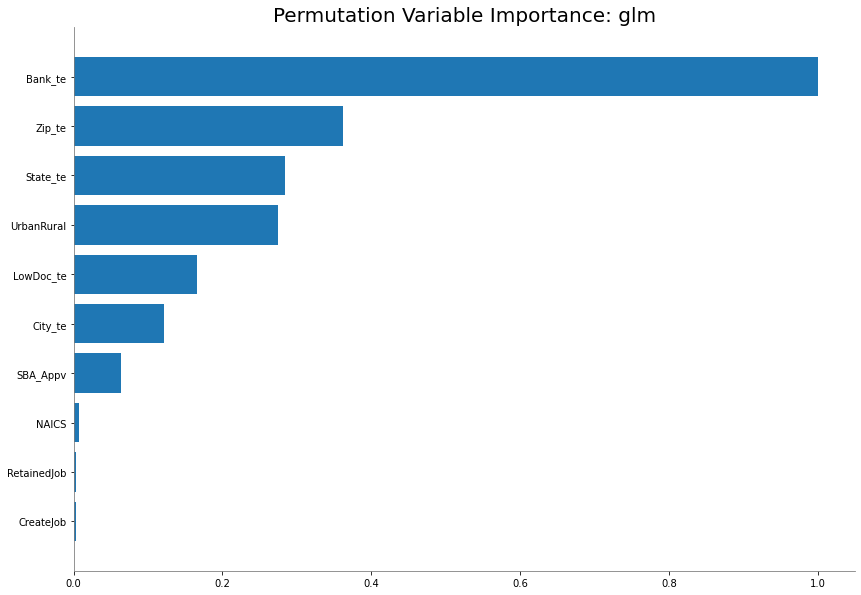


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,Bank_te,0.134075,1.000000,0.437413
1,Zip_te,0.048550,0.362114,0.158393
2,State_te,0.038070,0.283945,0.124201
3,UrbanRural,0.036856,0.274891,0.120241
4,LowDoc_te,0.022285,0.166211,0.072703
5,City_te,0.016353,0.121971,0.053352
6,SBA_Appv,0.008565,0.063886,0.027944
7,NAICS,0.001028,0.007664,0.003352
8,RetainedJob,0.000380,0.002836,0.001240
9,CreateJob,0.000356,0.002653,0.001161


In [38]:
import shap 

# calculate importance
permutation_varimp = glm_model_tuned_sba.permutation_importance(test_te, use_pandas=True)

# plot permutation importance (bar plot)
glm_model_tuned_sba.permutation_importance_plot(test_te)


Using feature permutation importance for GLM:
- The most important feature is `Bank_te`
- That is followed by `Zip_te`, and `State_te` and so on

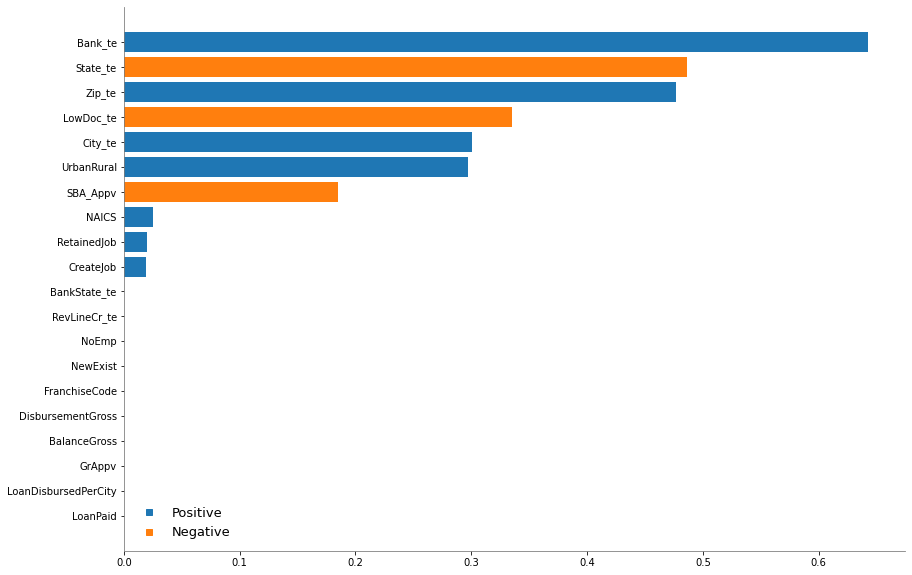

In [39]:
try:
    glm_model_tuned_sba.std_coef_plot()
except:
    pass

From the above graph we can conclude that:
- The Bank_te has a positive correlation with response variable MIS_Status.
- The State_te has a negative correlation with response variable MIS_Status.
- The importance of the features is from top to bottom.
- In general, the blue ones have a positive correlation and orange ones have a negative correlation.

## Boosted Tree Model

### GBM

- For GBM model we need not use target encoding for the categorical variables. 
- First running a default model for GBM

In [40]:
from h2o.estimators import H2OGradientBoostingEstimator

In [41]:
predictors_gbm = loans_train.columns
predictors_gbm.remove(response)

In [42]:
gbm_model = H2OGradientBoostingEstimator(nfolds=0,
                                         seed=1234,
                                         ntrees=500,
                                         stopping_rounds=5,
                                         stopping_metric = 'AUC',
                                         keep_cross_validation_predictions = False)

In [43]:
gbm_model.train(x=predictors_gbm, 
                y=response, 
                training_frame=loans_train, 
                validation_frame = loans_valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1651954762791_161


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,154.0,154.0,99223.0,0.0,5.0,4.967533,1.0,32.0,30.805195




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11045214124803744
RMSE: 0.33234340861229283
LogLoss: 0.3593873053422225
Mean Per-Class Error: 0.27279886224583955
AUC: 0.8177316626060499
AUCPR: 0.539917664245218
Gini: 0.6354633252120998

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2423644913306134: 


,,0,1,Error,Rate
0,0,397208.0,68863.0,0.1478,(68863.0/466071.0)
1,1,39444.0,59700.0,0.3978,(39444.0/99144.0)
2,Total,436652.0,128563.0,0.1916,(108307.0/565215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.242364,0.524358,220.0
1,max f2,0.129090,0.626631,292.0
2,max f0point5,0.408470,0.546913,146.0
3,max accuracy,0.469813,0.851671,123.0
4,max precision,0.971196,1.000000,0.0
5,max recall,0.017602,1.000000,393.0
6,max specificity,0.971196,1.000000,0.0
7,max absolute_mcc,0.312917,0.414748,186.0
8,max min_per_class_accuracy,0.166743,0.737049,265.0
9,max mean_per_class_accuracy,0.175431,0.737854,260.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.781036,4.939681,4.939681,0.866466,0.818441,0.866466,0.818441,0.049413,0.049413,393.968070,393.968070,0.047793
1,2,0.020001,0.720224,4.479246,4.709524,0.785702,0.750833,0.826095,0.784646,0.044783,0.094196,347.924590,370.952440,0.089978
2,3,0.030001,0.656766,4.173838,4.530973,0.732130,0.688509,0.794775,0.752602,0.041737,0.135934,317.383787,353.097275,0.128467
3,4,0.040001,0.601262,3.867205,4.365038,0.678344,0.627466,0.765669,0.721319,0.038671,0.174605,286.720503,336.503816,0.163237
4,5,0.050000,0.560299,3.565615,4.205159,0.625442,0.579744,0.737624,0.693005,0.035655,0.210260,256.561548,320.515928,0.194350
5,6,0.100001,0.418908,2.961928,3.583544,0.519550,0.482938,0.628587,0.587972,0.148098,0.358358,196.192813,258.354370,0.313315
6,7,0.150001,0.329354,2.232692,3.133260,0.391635,0.371668,0.549603,0.515871,0.111636,0.469993,123.269226,213.325989,0.388061
7,8,0.200000,0.267575,1.786338,2.796538,0.313340,0.296881,0.490539,0.461125,0.089315,0.559308,78.633805,179.653837,0.435741
8,9,0.300001,0.189665,1.320895,2.304654,0.231697,0.224975,0.404258,0.382408,0.132091,0.691398,32.089528,130.465444,0.474657
9,10,0.400000,0.143525,0.934104,1.962020,0.163851,0.164848,0.344157,0.328018,0.093410,0.784808,-6.589588,96.201989,0.466665




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.1125930215519609
RMSE: 0.33554883631441923
LogLoss: 0.3666359361591376
Mean Per-Class Error: 0.28534575814084545
AUC: 0.8048348929617432
AUCPR: 0.5220777277122995
Gini: 0.6096697859234863

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24945760638993367: 


,,0,1,Error,Rate
0,0,85491.0,14382.0,0.144,(14382.0/99873.0)
1,1,9065.0,12180.0,0.4267,(9065.0/21245.0)
2,Total,94556.0,26562.0,0.1936,(23447.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.249458,0.509549,207.0
1,max f2,0.128859,0.612409,287.0
2,max f0point5,0.433546,0.539832,126.0
3,max accuracy,0.455395,0.849998,118.0
4,max precision,0.931718,1.000000,0.0
5,max recall,0.016360,1.000000,394.0
6,max specificity,0.931718,1.000000,0.0
7,max absolute_mcc,0.326871,0.402150,170.0
8,max min_per_class_accuracy,0.163437,0.725361,261.0
9,max mean_per_class_accuracy,0.175855,0.726898,252.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.58 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.783041,4.779066,4.779066,0.838284,0.818632,0.838284,0.818632,0.047823,0.047823,377.906617,377.906617,0.045861
1,2,0.020005,0.722606,4.481720,4.630455,0.786127,0.752967,0.812216,0.785813,0.044811,0.092634,348.172042,363.045465,0.088078
2,3,0.030004,0.658976,4.133351,4.464799,0.725021,0.691342,0.783159,0.754331,0.041327,0.133961,313.335139,346.479916,0.126071
3,4,0.040002,0.602625,3.784982,4.294880,0.663914,0.629345,0.753354,0.723091,0.037844,0.171805,278.498237,329.488004,0.159840
4,5,0.050001,0.563098,3.502521,4.136434,0.614368,0.582404,0.725561,0.694958,0.035020,0.206825,250.252100,313.643440,0.190184
5,6,0.100002,0.421289,2.935230,3.535832,0.514861,0.485942,0.620211,0.590450,0.146764,0.353589,193.523042,253.583241,0.307531
6,7,0.150002,0.329978,2.137880,3.069848,0.375000,0.372820,0.538474,0.517907,0.106896,0.460485,113.787950,206.984811,0.376528
7,8,0.200003,0.267034,1.670954,2.720125,0.293098,0.296674,0.477130,0.462599,0.083549,0.544034,67.095382,172.012453,0.417213
8,9,0.300005,0.190364,1.286870,2.242373,0.225727,0.225285,0.393329,0.383494,0.128689,0.672723,28.686978,124.237295,0.452003
9,10,0.399998,0.143819,0.930633,1.914458,0.163240,0.165167,0.335810,0.328916,0.093057,0.765780,-6.936663,91.445836,0.443591




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-05-07 13:25:06,0.054 sec,0.0,0.380317,0.464361,0.500000,0.175409,1.000000,0.824591,0.380315,0.464358,0.500000,0.175407,1.000000,0.824593
1,,2022-05-07 13:25:07,1.334 sec,1.0,0.374938,0.451059,0.746337,0.416775,3.835162,0.259517,0.374964,0.451122,0.744624,0.413123,3.795006,0.259978
2,,2022-05-07 13:25:08,1.947 sec,2.0,0.370539,0.441034,0.751952,0.428996,3.879031,0.252131,0.370556,0.441077,0.750781,0.427086,3.855995,0.252770
3,,2022-05-07 13:25:08,2.441 sec,3.0,0.366735,0.432740,0.756982,0.438439,4.129840,0.215431,0.366795,0.432886,0.755461,0.435590,4.113467,0.215806
4,,2022-05-07 13:25:09,2.866 sec,4.0,0.363649,0.426226,0.758607,0.440225,4.129592,0.222874,0.363738,0.426433,0.756883,0.437229,4.113467,0.224442
5,,2022-05-07 13:25:09,3.290 sec,5.0,0.361172,0.421028,0.761246,0.442041,4.129468,0.217929,0.361258,0.421247,0.759355,0.439241,4.113467,0.218324
6,,2022-05-07 13:25:10,3.853 sec,6.0,0.359030,0.416583,0.762232,0.442733,4.128972,0.215044,0.359164,0.416913,0.760137,0.439768,4.113467,0.216434
7,,2022-05-07 13:25:14,8.044 sec,21.0,0.346814,0.390447,0.776201,0.470451,4.508725,0.198264,0.347328,0.391644,0.773219,0.465933,4.412169,0.199450
8,,2022-05-07 13:25:18,12.498 sec,39.0,0.341187,0.378851,0.790422,0.495280,4.540392,0.204504,0.342030,0.380919,0.785706,0.489761,4.528929,0.201861
9,,2022-05-07 13:25:23,17.171 sec,57.0,0.338743,0.373630,0.797305,0.506621,4.634542,0.192973,0.339893,0.376410,0.791382,0.499545,4.614433,0.198839



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,BankState,25647.363281,1.000000,0.266104
1,SBA_Appv,17105.949219,0.666967,0.177482
2,UrbanRural,13929.412109,0.543113,0.144524
3,State,10107.933594,0.394112,0.104875
4,Bank,9852.948242,0.384170,0.102229
5,RevLineCr,7798.441895,0.304064,0.080913
6,NAICS,3730.636475,0.145459,0.038707
7,GrAppv,1695.308960,0.066101,0.017590
8,DisbursementGross,1343.398682,0.052380,0.013938
9,NewExist,1233.815918,0.048107,0.012801


**Testing the performance of my GBM (not tuned yet) model on the testing dataset**

In [44]:
gbm_model.model_performance(loans_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.11234821844778785
RMSE: 0.3351838576778241
LogLoss: 0.36596878938975513
Mean Per-Class Error: 0.2834996463395073
AUC: 0.8059010129967907
AUCPR: 0.5241565933807748
Gini: 0.6118020259935815

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25657837009198314: 


,,0,1,Error,Rate
0,0,86076.0,13797.0,0.1381,(13797.0/99873.0)
1,1,9111.0,12134.0,0.4289,(9111.0/21245.0)
2,Total,95187.0,25931.0,0.1891,(22908.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.256578,0.514414,206.0
1,max f2,0.128412,0.613639,290.0
2,max f0point5,0.405596,0.536308,139.0
3,max accuracy,0.475001,0.849874,114.0
4,max precision,0.988182,1.000000,0.0
5,max recall,0.012491,1.000000,396.0
6,max specificity,0.988182,1.000000,0.0
7,max absolute_mcc,0.302184,0.405543,183.0
8,max min_per_class_accuracy,0.164330,0.726473,263.0
9,max mean_per_class_accuracy,0.186788,0.729630,248.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.63 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.782906,4.849623,4.849623,0.850660,0.819647,0.850660,0.819647,0.048529,0.048529,384.962325,384.962325,0.046717
1,2,0.020005,0.721742,4.434644,4.642219,0.777870,0.752119,0.814280,0.785897,0.044340,0.092869,343.464352,364.221902,0.088363
2,3,0.030004,0.657305,4.081567,4.455386,0.715937,0.688741,0.781508,0.753520,0.040810,0.133679,308.156681,345.538638,0.125728
3,4,0.040002,0.602017,3.841475,4.301940,0.673823,0.627538,0.754592,0.722031,0.038409,0.172088,284.147464,330.194012,0.160182
4,5,0.050001,0.561086,3.478983,4.137376,0.610239,0.580557,0.725727,0.693741,0.034785,0.206872,247.898255,313.737578,0.190241
5,6,0.100002,0.421480,2.893810,3.515593,0.507596,0.485005,0.616661,0.589373,0.144693,0.351565,189.380959,251.559269,0.305076
6,7,0.150002,0.331441,2.192480,3.074555,0.384577,0.373961,0.539300,0.517569,0.109626,0.461191,119.247968,207.455502,0.377384
7,8,0.200003,0.270244,1.738733,2.740600,0.304987,0.299203,0.480722,0.462977,0.086938,0.548129,73.873335,174.059960,0.422179
8,9,0.300005,0.191330,1.306639,2.262613,0.229194,0.227055,0.396879,0.384337,0.130666,0.678795,30.663881,126.261267,0.459366
9,10,0.399998,0.144277,0.885443,1.918342,0.155313,0.165957,0.336491,0.329745,0.088538,0.767333,-11.455672,91.834164,0.445475


## Model Tuning

- Performing model tuning for my GBM model here
- Not performing the cross validation here (nfolds=0) and instead using the validation_frame parameter
- Because it is a classification model, I am using the stopping metric as AUC
- In my grid search, I am tuning the following parameters using Cartesian search criteria - ntrees, learn_rate, max_depth, sample_rate, col_sample_rate, `balance_classes` and max_after_balance_size
- Since the dataset is heavily imbalanced, I am using balance_classes parameter to balance the classes.

In [45]:
from h2o.grid.grid_search import H2OGridSearch

gbm_model_tunes = H2OGradientBoostingEstimator(nfolds=0,
                                              seed = 1234,
                                              stopping_metric= 'AUC',
                                              stopping_rounds=5,
                                              keep_cross_validation_predictions = False)

gbm_params1_loans = { 
                'ntrees':[250,500],
                'learn_rate': [0.01, 0.1, 0.5],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8],
                'col_sample_rate': [1.0],
                'balance_classes': [True,False],
                'max_after_balance_size': [0.85, 1.7]
              }

#Train and validate a cartesian grid of GBMs
gbm_grid1_loans = H2OGridSearch(model=gbm_model_tunes,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1_loans,
                          search_criteria = {'strategy': "Cartesian"})

gbm_grid1_loans.train(x=predictors_gbm, y=response,
                training_frame=loans_train,
                validation_frame = loans_valid)

gbm Grid Build progress: |███████████████████████████████████████████████████████| 100%e) 100%
      balance_classes  col_sample_rate  learn_rate  max_after_balance_size  \
0                true              1.0        0.10                    1.70   
1                true              1.0        0.10                    1.70   
2                true              1.0        0.10                    0.85   
3                true              1.0        0.10                    0.85   
4               false              1.0        0.10                    0.85   
.. ..             ...              ...         ...                     ...   
67              false              1.0        0.01                    0.85   
68              false              1.0        0.01                    1.70   
69               true              1.0        0.01                    1.70   
70               true              1.0        0.01                    0.85   
71               true              1.0        0

**Sorting the results of my grid search in descending order based on AUC to get the model with highest AUC**

In [46]:
gbm_gridperf1 = gbm_grid1_loans.get_grid(sort_by='AUC', decreasing=True)
gbm_gridperf1

      balance_classes  col_sample_rate  learn_rate  max_after_balance_size  \
0                true              1.0        0.10                    1.70   
1                true              1.0        0.10                    1.70   
2                true              1.0        0.10                    0.85   
3                true              1.0        0.10                    0.85   
4               false              1.0        0.10                    0.85   
.. ..             ...              ...         ...                     ...   
67               true              1.0        0.01                    1.70   
68              false              1.0        0.01                    0.85   
69              false              1.0        0.01                    1.70   
70               true              1.0        0.01                    0.85   
71               true              1.0        0.01                    0.85   

    max_depth  ntrees  sample_rate           model_ids       au

In [47]:
bestmodel_gbm_sbaLoans = gbm_gridperf1.models[0]
bestmodel_gbm_sbaLoans

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  gbm_grid1_model_33


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,250.0,250.0,778265.0,0.0,9.0,3.78,1.0,490.0,151.924




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.23088306503756464
RMSE: 0.4805029292705349
LogLoss: 0.656581326348873
Mean Per-Class Error: 0.21141115425145324
AUC: 0.8750268654028018
AUCPR: 0.8621222034303079
Gini: 0.7500537308056037

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13104779637578526: 


,,0,1,Error,Rate
0,0,326787.0,139284.0,0.2988,(139284.0/466071.0)
1,1,57762.0,408154.0,0.124,(57762.0/465916.0)
2,Total,384549.0,547438.0,0.2114,(197046.0/931987.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.131048,0.805551,307.0
1,max f2,0.067284,0.880930,351.0
2,max f0point5,0.221804,0.798647,256.0
3,max accuracy,0.159555,0.794263,290.0
4,max precision,0.910493,1.000000,0.0
5,max recall,0.014338,1.000000,391.0
6,max specificity,0.910493,1.000000,0.0
7,max absolute_mcc,0.155949,0.589668,292.0
8,max min_per_class_accuracy,0.176678,0.791978,281.0
9,max mean_per_class_accuracy,0.159555,0.794268,290.0



Gains/Lift Table: Avg response rate: 49.99 %, avg score: 24.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.798737,1.965574,1.965574,0.982624,0.825562,0.982624,0.825562,0.019662,0.019662,96.557414,96.557414,0.019315
1,2,0.020003,0.772542,1.941739,1.953659,0.970708,0.785055,0.976667,0.805312,0.019418,0.039080,94.173924,95.365861,0.038147
2,3,0.030004,0.750263,1.931008,1.946109,0.965343,0.761167,0.972893,0.790598,0.019310,0.058390,93.100784,94.610916,0.056764
3,4,0.040003,0.729806,1.912111,1.937611,0.955897,0.739900,0.968644,0.777926,0.019119,0.077510,91.211112,93.761102,0.075001
4,5,0.050005,0.710633,1.899694,1.930027,0.949689,0.720293,0.964853,0.766398,0.019001,0.096511,89.969376,93.002659,0.092996
5,6,0.100002,0.603534,1.852917,1.891475,0.926304,0.656109,0.945580,0.711258,0.092641,0.189152,85.291670,89.147454,0.178270
6,7,0.150003,0.519027,1.783687,1.855546,0.891695,0.561049,0.927619,0.661188,0.089186,0.278338,78.368721,85.554569,0.256626
7,8,0.200001,0.442171,1.729626,1.824068,0.864669,0.479276,0.911882,0.615713,0.086477,0.364815,72.962646,82.406757,0.329573
8,9,0.300001,0.329187,1.611551,1.753229,0.805642,0.382134,0.876469,0.537853,0.161156,0.525970,61.155140,75.322885,0.451864
9,10,0.400002,0.243179,1.439832,1.674879,0.719796,0.284704,0.837300,0.474565,0.143985,0.669956,43.983174,67.487894,0.539817




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.11017229636302267
RMSE: 0.33192212394328685
LogLoss: 0.3566189367636521
Mean Per-Class Error: 0.2824283594695741
AUC: 0.8213924562518711
AUCPR: 0.5408101410814434
Gini: 0.6427849125037421

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26710044286674434: 


,,0,1,Error,Rate
0,0,87752.0,12121.0,0.1214,(12121.0/99873.0)
1,1,9422.0,11823.0,0.4435,(9422.0/21245.0)
2,Total,97174.0,23944.0,0.1779,(21543.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.267100,0.523269,200.0
1,max f2,0.116326,0.633141,290.0
2,max f0point5,0.406683,0.548465,140.0
3,max accuracy,0.490431,0.851641,110.0
4,max precision,0.914426,1.000000,0.0
5,max recall,0.005080,1.000000,396.0
6,max specificity,0.914426,1.000000,0.0
7,max absolute_mcc,0.313470,0.416004,179.0
8,max min_per_class_accuracy,0.154906,0.739092,263.0
9,max mean_per_class_accuracy,0.150641,0.740284,266.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 16.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.759420,4.924884,4.924884,0.863861,0.794939,0.863861,0.794939,0.049282,0.049282,392.488413,392.488413,0.047630
1,2,0.020005,0.710223,4.448767,4.686924,0.780347,0.734222,0.822121,0.764593,0.044481,0.093763,344.876659,368.692361,0.089448
2,3,0.030004,0.658850,4.194551,4.522845,0.735756,0.685383,0.793341,0.738197,0.041939,0.135703,319.455136,352.284469,0.128183
3,4,0.040002,0.610597,3.803813,4.343124,0.667217,0.632744,0.761816,0.711839,0.038032,0.173735,280.381313,334.312390,0.162180
4,5,0.050001,0.572693,3.544890,4.183504,0.621800,0.591990,0.733818,0.687873,0.035444,0.209179,254.489020,318.350352,0.193038
5,6,0.100002,0.419959,3.012424,3.597964,0.528402,0.492438,0.631110,0.590156,0.150624,0.359802,201.242378,259.796365,0.315065
6,7,0.150002,0.327204,2.225428,3.140452,0.390357,0.370005,0.550859,0.516772,0.111273,0.471076,122.542807,214.045179,0.389372
7,8,0.200003,0.263879,1.767916,2.797318,0.310106,0.294303,0.490670,0.461155,0.088397,0.559473,76.791621,179.731789,0.435936
8,9,0.300005,0.178398,1.332998,2.309211,0.233818,0.217143,0.405053,0.379817,0.133302,0.692775,33.299752,130.921110,0.476320
9,10,0.399998,0.129470,0.988533,1.979062,0.173396,0.151857,0.347142,0.322831,0.098847,0.791622,-1.146683,97.906207,0.474929




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-05-07 14:01:59,35 min 55.419 sec,0.0,0.596075,0.966622,0.500000,0.499917,1.000000,0.500083,0.380315,0.464358,0.500000,0.175407,1.000000,0.824593
1,,2022-05-07 14:02:01,35 min 57.678 sec,1.0,0.590039,0.942992,0.783600,0.782684,1.897518,0.308636,0.375303,0.451340,0.775186,0.465926,4.484183,0.218366
2,,2022-05-07 14:02:02,35 min 58.783 sec,2.0,0.584335,0.922682,0.789659,0.788856,1.908374,0.309604,0.371042,0.440609,0.780266,0.476799,4.563213,0.216516
3,,2022-05-07 14:02:03,36 min 0.091 sec,3.0,0.578923,0.904989,0.791840,0.790989,1.913289,0.305086,0.367334,0.431574,0.782480,0.480936,4.576416,0.219934
4,,2022-05-07 14:02:08,36 min 4.780 sec,8.0,0.555808,0.841571,0.800580,0.798817,1.914594,0.297247,0.354317,0.402497,0.789339,0.491722,4.610705,0.200400
5,,2022-05-07 14:02:13,36 min 10.327 sec,14.0,0.536509,0.797383,0.808819,0.804404,1.912899,0.287292,0.346212,0.386430,0.793595,0.495257,4.530580,0.202571
6,,2022-05-07 14:02:20,36 min 16.605 sec,21.0,0.522587,0.765745,0.818663,0.811757,1.929930,0.278607,0.341548,0.376995,0.799533,0.503434,4.581506,0.194868
7,,2022-05-07 14:02:26,36 min 22.888 sec,28.0,0.514137,0.745510,0.827032,0.818404,1.937728,0.268048,0.339241,0.372226,0.803331,0.509052,4.666175,0.192878
8,,2022-05-07 14:02:32,36 min 29.040 sec,35.0,0.507911,0.730225,0.834337,0.824705,1.937675,0.258167,0.337650,0.369035,0.806179,0.514278,4.704627,0.184432
9,,2022-05-07 14:02:39,36 min 35.984 sec,43.0,0.502157,0.716189,0.841220,0.831098,1.935321,0.249148,0.336025,0.365757,0.809725,0.520825,4.779066,0.191648



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,UrbanRural,106498.828125,1.000000,0.244694
1,BankState,78192.242188,0.734208,0.179656
2,State,55175.816406,0.518088,0.126773
3,Bank,51827.632812,0.486650,0.119080
4,SBA_Appv,47504.371094,0.446055,0.109147
5,RevLineCr,19088.382812,0.179236,0.043858
6,NAICS,18390.970703,0.172687,0.042255
7,Zip,9150.826172,0.085924,0.021025
8,City,8560.709961,0.080383,0.019669
9,GrAppv,8247.016602,0.077438,0.018948


**The parameters selected by the grid search for the best model are:** 

In [48]:
print("The best set of parameters for the GBM function:")
print("Best value for ntrees", bestmodel_gbm_sbaLoans.actual_params['ntrees'])
print("Best value for learn rate", bestmodel_gbm_sbaLoans.actual_params['learn_rate'])
print("Best value for max_depth", bestmodel_gbm_sbaLoans.actual_params['max_depth'])
print("Best value for sample_rate", bestmodel_gbm_sbaLoans.actual_params['sample_rate'])
print("Best value for col_sample_rate", bestmodel_gbm_sbaLoans.actual_params['col_sample_rate'])
print("Best value for balance_classes", bestmodel_gbm_sbaLoans.actual_params['balance_classes'])
print("Best value for max_after_balance_size", bestmodel_gbm_sbaLoans.actual_params['max_after_balance_size'])

The best set of parameters for the GBM function:
Best value for ntrees 250
Best value for learn rate 0.1
Best value for max_depth 9
Best value for sample_rate 0.8
Best value for col_sample_rate 1.0
Best value for balance_classes True
Best value for max_after_balance_size 1.7


### Final Best Tuned GBM Model

- Training my model with the best parameters selected by Grid Search with below results:
- ntrees = 250
- learn_rate = 0.1
- max_depth = 9
- sample_rate = 0.8
- col_sample_rate = 1
- balance_classes = True
- max_after_balance_size = 1.7
- Just showing it as a reference because the actual grid search will take time to reproduce results

In [49]:
gbm_model_tuned_sba = H2OGradientBoostingEstimator(nfolds=0,
                                              seed = 1234,
                                              stopping_metric= 'AUC',
                                              stopping_rounds=5,
                                              keep_cross_validation_predictions = False,
                                              ntrees = 250,
                                              learn_rate = 0.1,
                                              max_depth = 9,
                                              sample_rate = 0.8,
                                              col_sample_rate = 1,
                                              balance_classes = True,
                                              max_after_balance_size = 1.7)  

gbm_model_tuned_sba.train(x=predictors_gbm, y=response,
                          training_frame=loans_train,
                          validation_frame = loans_valid)
                

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1651954762791_3205


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,250.0,250.0,778269.0,0.0,9.0,3.78,1.0,490.0,151.924




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.23088306503756464
RMSE: 0.4805029292705349
LogLoss: 0.656581326348873
Mean Per-Class Error: 0.21141115425145324
AUC: 0.8750268654028018
AUCPR: 0.8621222034303079
Gini: 0.7500537308056037

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.13104779637578526: 


,,0,1,Error,Rate
0,0,326787.0,139284.0,0.2988,(139284.0/466071.0)
1,1,57762.0,408154.0,0.124,(57762.0/465916.0)
2,Total,384549.0,547438.0,0.2114,(197046.0/931987.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.131048,0.805551,307.0
1,max f2,0.067284,0.880930,351.0
2,max f0point5,0.221804,0.798647,256.0
3,max accuracy,0.159555,0.794263,290.0
4,max precision,0.910493,1.000000,0.0
5,max recall,0.014338,1.000000,391.0
6,max specificity,0.910493,1.000000,0.0
7,max absolute_mcc,0.155949,0.589668,292.0
8,max min_per_class_accuracy,0.176678,0.791978,281.0
9,max mean_per_class_accuracy,0.159555,0.794268,290.0



Gains/Lift Table: Avg response rate: 49.99 %, avg score: 24.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.798737,1.965574,1.965574,0.982624,0.825562,0.982624,0.825562,0.019662,0.019662,96.557414,96.557414,0.019315
1,2,0.020003,0.772542,1.941739,1.953659,0.970708,0.785055,0.976667,0.805312,0.019418,0.039080,94.173924,95.365861,0.038147
2,3,0.030004,0.750263,1.931008,1.946109,0.965343,0.761167,0.972893,0.790598,0.019310,0.058390,93.100784,94.610916,0.056764
3,4,0.040003,0.729806,1.912111,1.937611,0.955897,0.739900,0.968644,0.777926,0.019119,0.077510,91.211112,93.761102,0.075001
4,5,0.050005,0.710633,1.899694,1.930027,0.949689,0.720293,0.964853,0.766398,0.019001,0.096511,89.969376,93.002659,0.092996
5,6,0.100002,0.603534,1.852917,1.891475,0.926304,0.656109,0.945580,0.711258,0.092641,0.189152,85.291670,89.147454,0.178270
6,7,0.150003,0.519027,1.783687,1.855546,0.891695,0.561049,0.927619,0.661188,0.089186,0.278338,78.368721,85.554569,0.256626
7,8,0.200001,0.442171,1.729626,1.824068,0.864669,0.479276,0.911882,0.615713,0.086477,0.364815,72.962646,82.406757,0.329573
8,9,0.300001,0.329187,1.611551,1.753229,0.805642,0.382134,0.876469,0.537853,0.161156,0.525970,61.155140,75.322885,0.451864
9,10,0.400002,0.243179,1.439832,1.674879,0.719796,0.284704,0.837300,0.474565,0.143985,0.669956,43.983174,67.487894,0.539817




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.11017229636302267
RMSE: 0.33192212394328685
LogLoss: 0.3566189367636521
Mean Per-Class Error: 0.2824283594695741
AUC: 0.8213924562518711
AUCPR: 0.5408101410814434
Gini: 0.6427849125037421

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.26710044286674434: 


,,0,1,Error,Rate
0,0,87752.0,12121.0,0.1214,(12121.0/99873.0)
1,1,9422.0,11823.0,0.4435,(9422.0/21245.0)
2,Total,97174.0,23944.0,0.1779,(21543.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.267100,0.523269,200.0
1,max f2,0.116326,0.633141,290.0
2,max f0point5,0.406683,0.548465,140.0
3,max accuracy,0.490431,0.851641,110.0
4,max precision,0.914426,1.000000,0.0
5,max recall,0.005080,1.000000,396.0
6,max specificity,0.914426,1.000000,0.0
7,max absolute_mcc,0.313470,0.416004,179.0
8,max min_per_class_accuracy,0.154906,0.739092,263.0
9,max mean_per_class_accuracy,0.150641,0.740284,266.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 16.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.759420,4.924884,4.924884,0.863861,0.794939,0.863861,0.794939,0.049282,0.049282,392.488413,392.488413,0.047630
1,2,0.020005,0.710223,4.448767,4.686924,0.780347,0.734222,0.822121,0.764593,0.044481,0.093763,344.876659,368.692361,0.089448
2,3,0.030004,0.658850,4.194551,4.522845,0.735756,0.685383,0.793341,0.738197,0.041939,0.135703,319.455136,352.284469,0.128183
3,4,0.040002,0.610597,3.803813,4.343124,0.667217,0.632744,0.761816,0.711839,0.038032,0.173735,280.381313,334.312390,0.162180
4,5,0.050001,0.572693,3.544890,4.183504,0.621800,0.591990,0.733818,0.687873,0.035444,0.209179,254.489020,318.350352,0.193038
5,6,0.100002,0.419959,3.012424,3.597964,0.528402,0.492438,0.631110,0.590156,0.150624,0.359802,201.242378,259.796365,0.315065
6,7,0.150002,0.327204,2.225428,3.140452,0.390357,0.370005,0.550859,0.516772,0.111273,0.471076,122.542807,214.045179,0.389372
7,8,0.200003,0.263879,1.767916,2.797318,0.310106,0.294303,0.490670,0.461155,0.088397,0.559473,76.791621,179.731789,0.435936
8,9,0.300005,0.178398,1.332998,2.309211,0.233818,0.217143,0.405053,0.379817,0.133302,0.692775,33.299752,130.921110,0.476320
9,10,0.399998,0.129470,0.988533,1.979062,0.173396,0.151857,0.347142,0.322831,0.098847,0.791622,-1.146683,97.906207,0.474929




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-05-07 16:32:46,0.033 sec,0.0,0.596075,0.966622,0.500000,0.499917,1.000000,0.500083,0.380315,0.464358,0.500000,0.175407,1.000000,0.824593
1,,2022-05-07 16:32:48,2.126 sec,1.0,0.590039,0.942992,0.783600,0.782684,1.897518,0.308636,0.375303,0.451340,0.775186,0.465926,4.484183,0.218366
2,,2022-05-07 16:32:49,3.175 sec,2.0,0.584335,0.922682,0.789659,0.788856,1.908374,0.309604,0.371042,0.440609,0.780266,0.476799,4.563213,0.216516
3,,2022-05-07 16:32:51,4.337 sec,3.0,0.578923,0.904989,0.791840,0.790989,1.913289,0.305086,0.367334,0.431574,0.782480,0.480936,4.576416,0.219934
4,,2022-05-07 16:32:55,8.418 sec,9.0,0.552080,0.832749,0.801545,0.799508,1.914405,0.292351,0.352588,0.398974,0.789887,0.491657,4.597289,0.204503
5,,2022-05-07 16:32:59,12.606 sec,15.0,0.533937,0.791783,0.810126,0.805354,1.912765,0.288711,0.345254,0.384609,0.794357,0.496234,4.532867,0.199954
6,,2022-05-07 16:33:03,16.738 sec,21.0,0.522587,0.765745,0.818663,0.811757,1.929930,0.278607,0.341548,0.376995,0.799533,0.503434,4.581506,0.194868
7,,2022-05-07 16:33:07,21.006 sec,27.0,0.515309,0.748307,0.825674,0.817096,1.932308,0.269494,0.339675,0.373070,0.802416,0.507404,4.607732,0.197700
8,,2022-05-07 16:33:13,26.385 sec,34.0,0.508844,0.732452,0.833169,0.823591,1.939463,0.259553,0.337949,0.369583,0.805684,0.513030,4.708509,0.186405
9,,2022-05-07 16:33:17,30.713 sec,40.0,0.504442,0.721941,0.838092,0.828203,1.935723,0.253342,0.336654,0.367062,0.808211,0.518216,4.746927,0.189097



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,UrbanRural,106498.828125,1.000000,0.244694
1,BankState,78192.242188,0.734208,0.179656
2,State,55175.816406,0.518088,0.126773
3,Bank,51827.632812,0.486650,0.119080
4,SBA_Appv,47504.371094,0.446055,0.109147
5,RevLineCr,19088.382812,0.179236,0.043858
6,NAICS,18390.970703,0.172687,0.042255
7,Zip,9150.826172,0.085924,0.021025
8,City,8560.709961,0.080383,0.019669
9,GrAppv,8247.016602,0.077438,0.018948


**Testing the performance of my final best tuned GBM model on the testing dataset**

In [50]:
gbm_model_tuned_sba.model_performance(loans_test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1100073465185046
RMSE: 0.33167355414398747
LogLoss: 0.356341778183941
Mean Per-Class Error: 0.27656657727966905
AUC: 0.8215421898355039
AUCPR: 0.5419655682393372
Gini: 0.6430843796710077

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25554039865918865: 


,,0,1,Error,Rate
0,0,86751.0,13122.0,0.1314,(13122.0/99873.0)
1,1,8960.0,12285.0,0.4217,(8960.0/21245.0)
2,Total,95711.0,25407.0,0.1823,(22082.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.255540,0.526666,207.0
1,max f2,0.120777,0.633504,287.0
2,max f0point5,0.398546,0.548053,141.0
3,max accuracy,0.469869,0.851368,115.0
4,max precision,0.911780,1.000000,0.0
5,max recall,0.003224,1.000000,398.0
6,max specificity,0.911780,1.000000,0.0
7,max absolute_mcc,0.288770,0.419181,190.0
8,max min_per_class_accuracy,0.157217,0.742386,261.0
9,max mean_per_class_accuracy,0.155757,0.743048,262.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 16.35 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.759811,4.929588,4.929588,0.864686,0.797110,0.864686,0.797110,0.049329,0.049329,392.958794,392.958794,0.047687
1,2,0.020005,0.710293,4.467597,4.698688,0.783650,0.733890,0.824185,0.765513,0.044669,0.093999,346.759735,369.868798,0.089733
2,3,0.030004,0.658355,4.114521,4.504019,0.721718,0.685120,0.790039,0.738723,0.041139,0.135138,311.452064,350.401911,0.127498
3,4,0.040002,0.609020,3.813229,4.331357,0.668869,0.632078,0.759752,0.712067,0.038127,0.173264,281.322851,333.135711,0.161609
4,5,0.050001,0.571472,3.507229,4.166559,0.615194,0.589935,0.730845,0.687645,0.035067,0.208331,250.722869,316.655864,0.192011
5,6,0.100002,0.421311,3.011482,3.589021,0.528236,0.491397,0.629541,0.589521,0.150577,0.358908,201.148240,258.902052,0.313981
6,7,0.150002,0.329873,2.293208,3.157083,0.402246,0.372017,0.553776,0.517020,0.114662,0.473570,129.320760,215.708288,0.392397
7,8,0.200003,0.265205,1.782037,2.813321,0.312583,0.295772,0.493478,0.461708,0.089103,0.562674,78.203694,181.332140,0.439818
8,9,0.300005,0.179824,1.335822,2.320821,0.234313,0.218730,0.407089,0.380715,0.133584,0.696258,33.582167,132.082149,0.480544
9,10,0.399998,0.130578,0.961702,1.981063,0.168690,0.153256,0.347493,0.323854,0.096164,0.792422,-3.829845,98.106254,0.475900


### Saving my best model

- Used the first grid result model with highest AUC and saved it locally to be used later for the scoring function
- Also, using the final best tuned GBM model because it had good results in terms of AUC, Accuracy, AUCPR, F1 etc for the scoring function.

In [51]:
# # save the model
# model_path = h2o.save_model(model=bestmodel_gbm_sbaLoans, path="/Users/General/Documents/UTD/Semester 3/Applied Machine Learning/Projects/Project 2/SBALoans/artifacts_SBALoans", force=True)
# print(model_path)

C:\Users\General\Documents\UTD\Semester 3\Applied Machine Learning\Projects\Project 2\SBALoans\artifacts_SBALoans\gbm_grid1_model_33


In [52]:
# upload the model that you just downloded above
# to the H2O cluster
model_path = "./artifacts_SBALoans/gbm_grid1_model_33"

In [53]:
best_gbm_sba = h2o.upload_model(model_path)

**A function to evaluate the performance of the model**

In [54]:
def evaluate_model(eval_loans_model):
    print("AUC:", eval_loans_model.auc())
    print("Accuracy:", eval_loans_model.accuracy()[0][1])
    print("AUCPR:", eval_loans_model.aucpr())
    print("F0point5:",  eval_loans_model.F0point5()[0][1])
    print("F1:",  eval_loans_model.F1()[0][1])
    print("F2:", eval_loans_model.F2()[0][1])
    print("Precision:", eval_loans_model.precision()[0][1])
    print("Recall:", eval_loans_model.recall()[0][1])

In [55]:
eval_loans_train = best_gbm_sba.model_performance(loans_train)
eval_loans_test = best_gbm_sba.model_performance(loans_test)

**Final metrics of the best tuned GBM model using training dataset**

In [56]:
print("Model Performance on Training dataset:")
evaluate_model(eval_loans_train)

Model Performance on Training dataset:
AUC: 0.8748264154229024
Accuracy: 0.8600001769238255
AUCPR: 0.6099137559438278
F0point5: 0.5915977737273793
F1: 0.5876059854698038
F2: 0.6976009998009534
Precision: 1.0
Recall: 1.0


**Final metrics of the best tuned GBM model using test dataset**

In [57]:
print("Model Performance on Test dataset:")
evaluate_model(eval_loans_test)

Model Performance on Test dataset:
AUC: 0.8215421898355039
Accuracy: 0.8513680873198038
AUCPR: 0.5419655682393372
F0point5: 0.5480531623589128
F1: 0.5266655234502272
F2: 0.6335038681392677
Precision: 1.0
Recall: 1.0


Confusion Matrix on test dataset:

In [58]:
eval_loans_test


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1100073465185046
RMSE: 0.33167355414398747
LogLoss: 0.356341778183941
Mean Per-Class Error: 0.27656657727966905
AUC: 0.8215421898355039
AUCPR: 0.5419655682393372
Gini: 0.6430843796710077

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25554039865918865: 


,,0,1,Error,Rate
0,0,86751.0,13122.0,0.1314,(13122.0/99873.0)
1,1,8960.0,12285.0,0.4217,(8960.0/21245.0)
2,Total,95711.0,25407.0,0.1823,(22082.0/121118.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.255540,0.526666,207.0
1,max f2,0.120777,0.633504,287.0
2,max f0point5,0.398546,0.548053,141.0
3,max accuracy,0.469869,0.851368,115.0
4,max precision,0.911780,1.000000,0.0
5,max recall,0.003224,1.000000,398.0
6,max specificity,0.911780,1.000000,0.0
7,max absolute_mcc,0.288770,0.419181,190.0
8,max min_per_class_accuracy,0.157217,0.742386,261.0
9,max mean_per_class_accuracy,0.155757,0.743048,262.0



Gains/Lift Table: Avg response rate: 17.54 %, avg score: 16.35 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010007,0.759811,4.929588,4.929588,0.864686,0.797110,0.864686,0.797110,0.049329,0.049329,392.958794,392.958794,0.047687
1,2,0.020005,0.710293,4.467597,4.698688,0.783650,0.733890,0.824185,0.765513,0.044669,0.093999,346.759735,369.868798,0.089733
2,3,0.030004,0.658355,4.114521,4.504019,0.721718,0.685120,0.790039,0.738723,0.041139,0.135138,311.452064,350.401911,0.127498
3,4,0.040002,0.609020,3.813229,4.331357,0.668869,0.632078,0.759752,0.712067,0.038127,0.173264,281.322851,333.135711,0.161609
4,5,0.050001,0.571472,3.507229,4.166559,0.615194,0.589935,0.730845,0.687645,0.035067,0.208331,250.722869,316.655864,0.192011
5,6,0.100002,0.421311,3.011482,3.589021,0.528236,0.491397,0.629541,0.589521,0.150577,0.358908,201.148240,258.902052,0.313981
6,7,0.150002,0.329873,2.293208,3.157083,0.402246,0.372017,0.553776,0.517020,0.114662,0.473570,129.320760,215.708288,0.392397
7,8,0.200003,0.265205,1.782037,2.813321,0.312583,0.295772,0.493478,0.461708,0.089103,0.562674,78.203694,181.332140,0.439818
8,9,0.300005,0.179824,1.335822,2.320821,0.234313,0.218730,0.407089,0.380715,0.133584,0.696258,33.582167,132.082149,0.480544
9,10,0.399998,0.130578,0.961702,1.981063,0.168690,0.153256,0.347493,0.323854,0.096164,0.792422,-3.829845,98.106254,0.475900


## Interpreting Final Trained GBM Model

In [59]:
import shap

**Global feature importance using Shapley values**

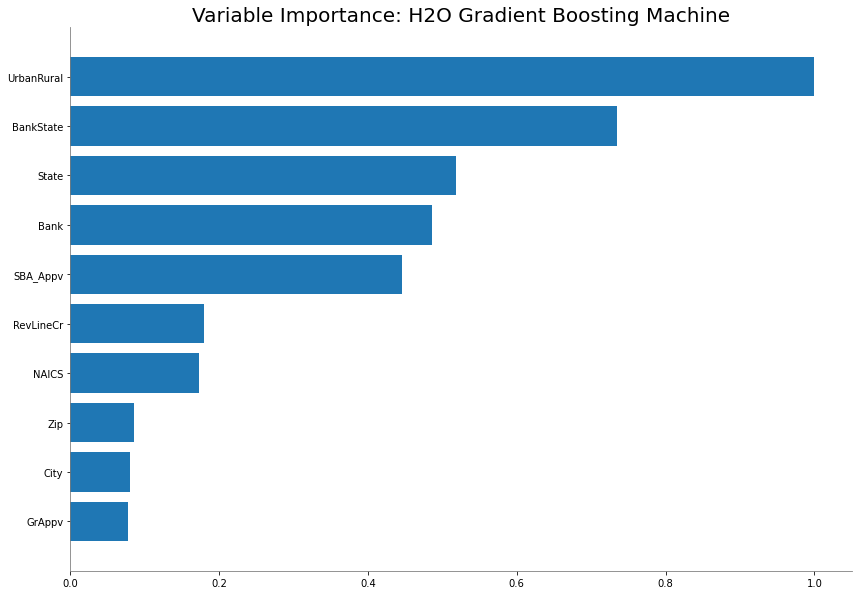

<Figure size 432x288 with 0 Axes>

In [60]:
best_gbm_sba.varimp_plot()

Using Global level interpretation of model using shapley values:
- The most important feature is `UrbanRural`
- It is followed by `BankState` and `State` and so on

**Calculating and Plotting permutation feature importance**

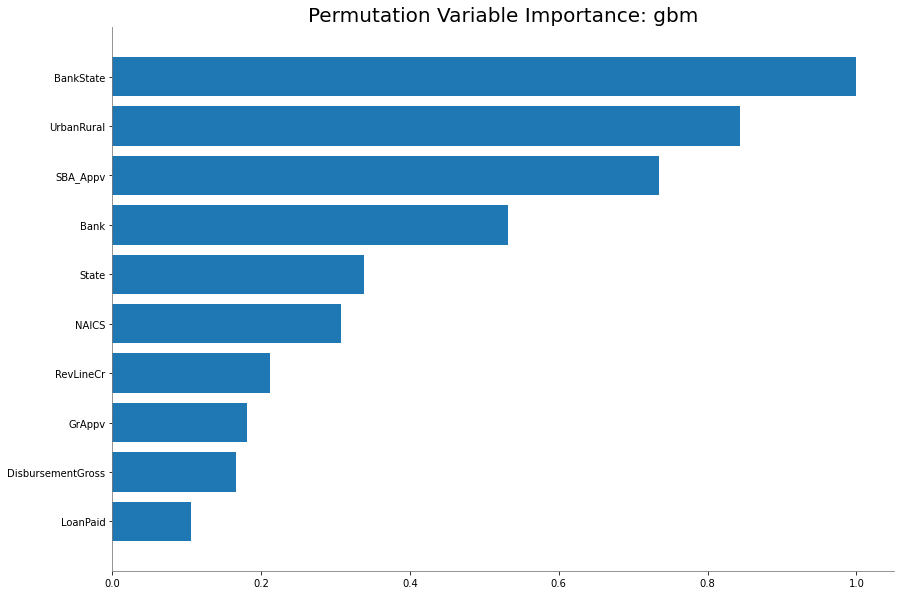


Variable Importances: 


,Variable,Relative Importance,Scaled Importance,Percentage
0,BankState,0.106695,1.000000,0.216835
1,UrbanRural,0.090020,0.843710,0.182946
2,SBA_Appv,0.078372,0.734537,0.159274
3,Bank,0.056712,0.531529,0.115254
4,State,0.036163,0.338935,0.073493
5,NAICS,0.032787,0.307292,0.066632
6,RevLineCr,0.022681,0.212581,0.046095
7,GrAppv,0.019339,0.181251,0.039302
8,DisbursementGross,0.017684,0.165745,0.035939
9,LoanPaid,0.011309,0.105996,0.022984


In [61]:
# calculate importance
permutation_varimp = best_gbm_sba.permutation_importance(loans_test, use_pandas=True)

# plot permutation importance (bar plot)
best_gbm_sba.permutation_importance_plot(loans_test)


Using feature permutation importance:
- The most important feature is `BankState`
- That is followed by `UrbanRural` and `SBA_Appv` and so on

**Summary plot with Shapley values**

In [62]:
def examine_all_reason_codes(data, model):
    
    shap_contribs = model.predict_contributions(data)
    
    col_mapping = {}
    for i in data.col_names: 
        related_cols = [x for x in shap_contribs.col_names if "{}.".format(i) in x]
        if len(related_cols) > 0:
            col_mapping[i] = related_cols
            
    for k, v in col_mapping.items():
        if len(v) > 1:
            shap_contribs[k] = shap_contribs[v].sum(axis=1,return_frame=True)
            shap_contribs = shap_contribs.drop(v)
        
    shap_cols = [i for i in shap_contribs.col_names if i != "BiasTerm"]
    bias_term = shap_contribs.as_data_frame()["BiasTerm"].values
    X = data.as_data_frame(use_pandas=True)
    shap_contribs = shap_contribs.as_data_frame(use_pandas=True)
    
    return shap.summary_plot(shap_contribs[shap_cols].values, 
                             X[shap_cols].values,
                             feature_names=shap_cols
                            )

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


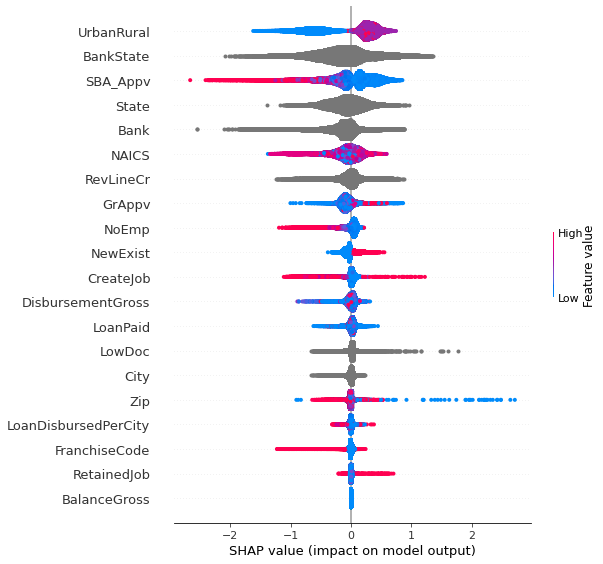

In [63]:
examine_all_reason_codes(loans_test, best_gbm_sba)

The above summary plot shows that:
- The most important feature is `UrbanRural`. It looks like it has a positive correlation with SHAP values. The higher the value of `UrbanRural` feature, the higher is the SHAP value(impact on model output)
- The second important feature is `BankState`.
- The third important feature is `SBA_Appv`. It has a negative correlation with SHAP values. The higher the value of `SBA_Appv`, the lower is the SHAP value(impact on model output)

## Individual observations analysis using Shapley values

In [64]:
preds1 = best_gbm_sba.predict(loans_test)
preds1

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.957859,0.0421409
0,0.967131,0.0328689
1,0.278196,0.721804
0,0.987586,0.0124144
0,0.83225,0.16775
1,0.185938,0.814062
1,0.670707,0.329293
0,0.863562,0.136438
0,0.988486,0.0115139
0,0.91799,0.0820104


In [65]:
yhat = 'p_MIS_Status'
resid = 'r_MIS_Status'
preds1 = best_gbm_sba.predict(loans_test).drop(['predict', 'p0'])
preds1.columns = [yhat]
test_yhat = loans_test.cbind(preds1[yhat])

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [66]:
test_yhat.head(3)

City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status
DALLAS,TX,75220,SMALL BUS. LOAN SOURCE LLC,TX,721110,2,2,0,0,1,1,N,N,1.333e+06,0,1.333e+06,999750,0,1.09674e+09,1.333e+06,0.0421409
SAN FRANCISCO,CA,94116,"CITIBANK, N.A.",CA,541512,2,1,0,2,1,1,Y,N,25000,0,25000,12500,0,7.79838e+08,25000,0.0328689
FORT WORTH,TX,76108,BBCN BANK,CA,236115,2,2,5,2,0,1,N,N,25000,0,25000,12500,1,4.62093e+08,25000,0.721804


**Adding Shapley values (contributions)**

In [67]:
pred_contributions_orig_table = best_gbm_sba.predict_contributions(loans_test)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [68]:
contrib_columns = []
for col in loans_test.columns:
    if col not in ['BiasTerm','MIS_Status']:
        contrib_columns.append("contrib_"+col)

contrib_columns.append('BiasTerm')
pred_contributions_orig_table.columns = contrib_columns

test_yhat = test_yhat.cbind(pred_contributions_orig_table)

include_columns = loans_test.columns

In [69]:
test_yhat.head(2)

City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm
DALLAS,TX,75220,SMALL BUS. LOAN SOURCE LLC,TX,721110,2,2,0,0,1,1,N,N,1.333e+06,0,1.333e+06,999750,0,1.09674e+09,1.333e+06,0.0421409,-0.025523,-0.132637,0.0151002,-0.161797,-0.155807,-0.556535,0.0627378,0.0910967,0.0261407,-0.000816618,-0.0144938,0.147606,0.00839538,0.00301594,-0.0481594,0,0.16742,-0.933315,-0.0331064,-0.0235421,-0.0120324
SAN FRANCISCO,CA,94116,"CITIBANK, N.A.",CA,541512,2,1,0,2,1,1,Y,N,25000,0,25000,12500,0,7.79838e+08,25000,0.0328689,-0.00758338,-0.0367236,-0.232269,-0.904901,-0.440371,-0.176027,-0.0145076,-0.037292,-0.0134101,0.00434095,-0.0124659,0.340541,-0.371256,-0.00961653,-0.10218,0,-0.02761,0.360527,-0.0366307,-0.104914,-0.0120324


Calculate deviance residuals for binomial classification
For binomial classification, deviance residuals are related to the logloss cost function. Like analyzing `y−ŷ` 
 for linear regression, these residuals are the quantities that the GBM sought to minimize. Deviance residual values are calculated by applying the simple formula in the cell directly below.

In [70]:
# use Pandas for adding columns and plotting
test_yhat = test_yhat.as_data_frame()
test_yhat['s'] = 1
test_yhat.loc[test_yhat['MIS_Status'] == 0, 's'] = -1

In [71]:
y = 'MIS_Status'
test_yhat['r_MIS_Status'] = test_yhat['s'] * np.sqrt(-2*(test_yhat[y]*np.log(test_yhat[yhat]) +
                                                                 ((1 - test_yhat[y])*np.log(1 - test_yhat[yhat]))))
test_yhat = test_yhat.drop('s', axis=1)

In [72]:
test_yhat.head(2)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm,r_MIS_Status
0,DALLAS,TX,75220,SMALL BUS. LOAN SOURCE LLC,TX,721110,2,2,0,0,1,1,N,N,1333000,0,1333000,999750,0,1096737602,1333000,0.042141,-0.025523,-0.132637,0.015100,-0.161797,-0.155807,-0.556535,0.062738,0.091097,0.026141,-0.000817,-0.014494,0.147606,0.008395,0.003016,-0.048159,0,0.16742,-0.933315,-0.033106,-0.023542,-0.012032,-0.293443
1,SAN FRANCISCO,CA,94116,"CITIBANK, N.A.",CA,541512,2,1,0,2,1,1,Y,N,25000,0,25000,12500,0,779837894,25000,0.032869,-0.007583,-0.036724,-0.232269,-0.904901,-0.440371,-0.176027,-0.014508,-0.037292,-0.013410,0.004341,-0.012466,0.340541,-0.371256,-0.009617,-0.102180,0,-0.02761,0.360527,-0.036631,-0.104914,-0.012032,-0.258539


In [73]:
test_yhat = test_yhat.sort_values(by='r_MIS_Status', ascending=False).reset_index(drop=True)
test_yhat.head(5)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm,r_MIS_Status
0,LEAWOOD,KS,66209,CITIZENS BK & TR CO,MO,722211,60,1,12,60,10643,1,N,N,1750000,0,1750000,1575000,1,24056079,1750000,0.003035,-0.035507,-0.444591,-0.007853,-0.273986,-0.552950,0.086470,-0.866815,-0.104721,-0.496380,-0.016803,-0.038068,0.254119,-0.085236,0.007829,-0.057526,0,0.139046,-1.686180,0.004879,-0.060845,-0.012032,3.405179
1,ALEXANDRIA,VA,22302,"PREMIER BANK, INC.",DC,561920,11,2,4,11,0,1,Y,Missing,500000,0,500000,375000,1,141362483,500000,0.005829,-0.180304,-0.363364,-0.058860,-0.218957,-1.332298,-0.359269,-0.125869,0.263268,-0.178586,0.038236,0.012216,0.112183,-0.338583,-0.210898,-0.041318,0,-0.004485,-0.549659,-0.007623,-0.035357,-0.012032,3.207753
2,BEVERLY HILLS,CA,90211,1ST CENTENNIAL BANK,CA,0,1,2,0,0,1,1,N,N,35000,0,35000,28000,1,54067149,35000,0.006722,-0.028000,-0.180272,-0.118478,-1.508731,-0.471880,-0.733225,-0.035165,0.061405,-0.014762,0.001908,-0.024416,0.087737,-0.276585,0.016155,-0.114033,0,-0.026061,0.002400,-0.012441,-0.061746,-0.012032,3.163036
3,GWYNN OAK,MD,21207,HOWARD BANK,MD,339932,1,2,4,2,1,0,0,A,100000,0,100000,85000,1,1121897,100000,0.007256,-0.135022,-0.732179,-0.026137,-0.028024,-1.023906,-0.042204,-0.003709,0.011405,-0.128513,0.003967,-0.012582,-0.789029,0.162193,-0.289907,-0.061572,0,-0.203292,-0.034846,-0.034882,0.009137,-0.012032,3.138745
4,SIDNEY,NE,69162,POINTS WEST COMMUNITY BANK,NE,532230,1,1,0,0,1,1,0,Y,7000,0,7000,5950,1,28695120,7000,0.007330,-0.045251,-0.602495,-0.011107,-0.883706,-1.173601,-0.086213,-0.006277,-0.047673,-0.049834,-0.005162,-0.005755,0.066843,-0.112829,-0.145996,-0.142514,0,-0.086399,-0.078379,-0.012304,0.079678,-0.012032,3.135536


In [90]:
shap.initjs()
def examine_indiv_reason_codes(df_vals_and_cotribs,
                               rec_num, 
                               include_columns, 
                               contrib_columns,
                               use_matplotlib=False):
    
    shap_columns = contrib_columns.copy()
    shap_columns.remove("BiasTerm")
    ftr_columns = include_columns.copy()
    ftr_columns.remove("MIS_Status")
    bias = df_vals_and_cotribs['BiasTerm'].iloc[rec_num]
    shap_contribs = df_vals_and_cotribs[shap_columns].iloc[rec_num,:].values
    ftr_values =    df_vals_and_cotribs[ftr_columns].iloc[rec_num,:].values
    
    return shap.force_plot(bias, 
                           shap_contribs, 
                           ftr_values, 
                           shap_columns,
                           link="logit",
                           matplotlib=use_matplotlib)

In [76]:
correct_test_yhat = test_yhat
correct_test_yhat['r_MIS_Status_abs'] = abs(correct_test_yhat['r_MIS_Status'])

In [77]:
correct_test_yhat = correct_test_yhat.sort_values(by='r_MIS_Status_abs', ascending=False).reset_index(drop=True)

### 1. Label 0 is correctly identified

In [78]:
correct_test_yhat[correct_test_yhat['MIS_Status'] == 0].tail(2)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm,r_MIS_Status,r_MIS_Status_abs
121116,BILOXI,MS,39532,SOUTHERN DEVELOPMENT COUNCIL,AL,721110,40,2,11,29,38605,1,N,N,1300000,0,1300000,1300000,0,65276668,1300000,0.000732,-0.034452,-0.578636,-0.007519,-0.340302,-0.691347,-0.691970,-0.872282,0.02050,-0.552220,-0.015798,-0.145669,0.197029,-0.118462,-0.037783,-0.004222,0,0.002373,-1.798861,0.004512,0.005789,-0.012032,-0.038273,0.038273
121117,QUINCY,MA,2169,BAY COLONY DEVEL CORP,MA,541310,60,1,20,60,1,0,N,N,1000000,0,1000000,1000000,0,64329809,1000000,0.000690,-0.011092,-0.499353,0.045161,-0.669728,-0.717872,-0.365462,-0.635523,-0.10692,-0.745594,-0.039618,-0.011736,-0.726768,-0.144594,-0.023230,-0.046542,0,-0.096863,-0.886696,-0.020281,-0.015953,-0.012032,-0.037155,0.037155


**Record 1**

In [91]:
examine_indiv_reason_codes(correct_test_yhat,121116,include_columns,contrib_columns)

The label has been correctly identified as MIS_Status = 0 with a 0 probability of being MIS_Status =1. The major factors influencing it are SBA_Appv and NoEmp pushing the probability towards 0.

**Record 2**

In [92]:
examine_indiv_reason_codes(correct_test_yhat,121117,include_columns,contrib_columns)

The label has been correctly identified as MIS_Status = 0 with a 0 probability of being MIS_Status =1. The major factors influencing it are SBA_Appv and CreateJob pushing the probability towards 0.

### 2. Label 0 is identified as 1 ###

Plotting records with largest negative residuals, when MIS_Status=0 and model predicts high probability of MIS_Status=1.

In [81]:
test_yhat.tail(2)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm,r_MIS_Status,r_MIS_Status_abs
121116,GREENVIEW,IL,62642,BBCN BANK,CA,236118,1,1,2,2,0,1,N,Missing,25000,0,25000,22500,0,270000,25000,0.845396,0.038615,0.222278,0.006275,0.314945,0.690270,0.152407,0.109695,-0.015053,0.030622,0.001531,0.020599,0.441659,0.326656,0.286097,0.041007,0,-0.040914,0.582025,-0.003807,0.053493,-0.012032,-1.932299,1.932299
121117,POMPANO BEACH,FL,33064,BANK OF AMERICA NATL ASSOC,NC,492110,1,2,1,2,0,1,N,Missing,45000,0,45000,38250,0,141106312,45000,0.848710,0.027247,0.311700,0.059813,0.214379,0.443303,0.052896,0.079318,0.052089,-0.000476,0.000530,0.022974,0.500779,0.504009,0.460397,-0.014243,0,-0.045483,0.578120,-0.007699,0.044336,-0.012032,-1.943480,1.943480


**Record 1**

In [93]:
examine_indiv_reason_codes(test_yhat,121116,include_columns,contrib_columns)

The label has been incorrectly identified as MIS_Status = 1 with a 0.96 probability of being MIS_Status =1. The major factors influencing it are SBA_Appv and BankState pushing the probability towards 1.

**Record 2**

In [94]:
examine_indiv_reason_codes(test_yhat,121117,include_columns,contrib_columns)

The label has been incorrectly identified as MIS_Status = 1 with a 0.96 probability of being MIS_Status =1. The major factors influencing it are SBA_Appv and RevLineCr  pushing the probability towards 1.

### 3. Label 1 is correctly identified ###

In [84]:
correct_test_yhat[correct_test_yhat['MIS_Status'] == 1].tail(2)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm,r_MIS_Status,r_MIS_Status_abs
66872,JAMAICA,NY,11435,HSBC BK USA NATL ASSOC,VA,442110,2,1,2,4,1,1,Y,N,200000,0,100000,50000,1,47995092,200000,0.912562,0.023035,0.462413,0.095405,0.336369,1.269396,0.183671,0.096616,-0.015068,0.032142,0.010917,0.000481,0.510431,0.025165,0.029793,0.098189,0,0.018905,0.662553,0.00772,0.056659,-0.012032,0.427784,0.427784
70123,BROOKLYN,NY,11233,HSBC BK USA NATL ASSOC,VA,722211,4,2,0,4,0,1,Y,N,159000,0,80000,40000,1,436503515,159000,0.920338,0.018179,0.494279,0.200172,0.338114,1.312297,0.137410,0.085996,0.024957,0.009123,0.010180,0.018050,0.516453,0.014819,0.032357,0.112468,0,0.043023,0.582114,0.00523,0.051194,-0.012032,0.407466,0.407466


**Record 1**

In [95]:
examine_indiv_reason_codes(correct_test_yhat,66872,include_columns,contrib_columns)

The label has been correctly identified as MIS_Status = 1 with a 0.98 probability of being MIS_Status =1. The major factors influencing it are BankState and SBA_Appv pushing the probability towards 1.

**Record 2**

In [96]:
examine_indiv_reason_codes(correct_test_yhat,70123,include_columns,contrib_columns)

The label has been correctly identified as MIS_Status = 1 with a 0.98 probability of being MIS_Status =1. The major factors influencing it are BankState and SBA_Appv pushing the probability towards 1.

### 4. Label 1 is identified as 0 ###

**Plotting records with largest residuals when MIS_Status=1 and model predicted low probability of MIS_Status=1**

In [87]:
test_yhat.head(2)

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status,LoanDisbursedPerCity,LoanPaid,p_MIS_Status,contrib_City,contrib_State,contrib_Zip,contrib_Bank,contrib_BankState,contrib_NAICS,contrib_NoEmp,contrib_NewExist,contrib_CreateJob,contrib_RetainedJob,contrib_FranchiseCode,contrib_UrbanRural,contrib_RevLineCr,contrib_LowDoc,contrib_DisbursementGross,contrib_BalanceGross,contrib_GrAppv,contrib_SBA_Appv,contrib_LoanDisbursedPerCity,contrib_LoanPaid,BiasTerm,r_MIS_Status,r_MIS_Status_abs
0,LEAWOOD,KS,66209,CITIZENS BK & TR CO,MO,722211,60,1,12,60,10643,1,N,N,1750000,0,1750000,1575000,1,24056079,1750000,0.003035,-0.035507,-0.444591,-0.007853,-0.273986,-0.552950,0.086470,-0.866815,-0.104721,-0.496380,-0.016803,-0.038068,0.254119,-0.085236,0.007829,-0.057526,0,0.139046,-1.686180,0.004879,-0.060845,-0.012032,3.405179,3.405179
1,ALEXANDRIA,VA,22302,"PREMIER BANK, INC.",DC,561920,11,2,4,11,0,1,Y,Missing,500000,0,500000,375000,1,141362483,500000,0.005829,-0.180304,-0.363364,-0.058860,-0.218957,-1.332298,-0.359269,-0.125869,0.263268,-0.178586,0.038236,0.012216,0.112183,-0.338583,-0.210898,-0.041318,0,-0.004485,-0.549659,-0.007623,-0.035357,-0.012032,3.207753,3.207753


**Record 1**

In [97]:
examine_indiv_reason_codes(test_yhat,0,include_columns,contrib_columns)

The label has been incorrectly identified as MIS_Status = 0 with a 0.01 probability of being MIS_Status =1. The major factors influencing it are SBA_Appv and NoEmp pushing the probability towards 0.

**Record 2**

In [98]:
examine_indiv_reason_codes(test_yhat,1,include_columns,contrib_columns)

The label has been incorrectly identified as MIS_Status = 0 with a 0.03 probability of being MIS_Status =1. The major factors influencing it are BankState and SBA_Appv pushing the probability towards 0.